In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

In [102]:
plt.style.use('dark_background')

In [93]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [12.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

## Simple plots 

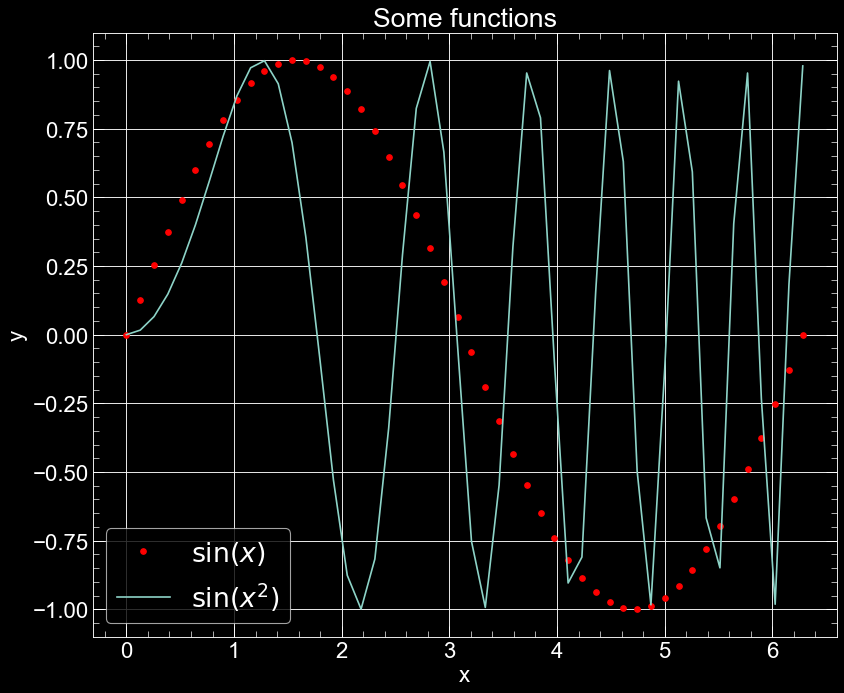

In [94]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = np.sin(x**2)
plt.plot(x, y, 'o', markersize=5, color='r', label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

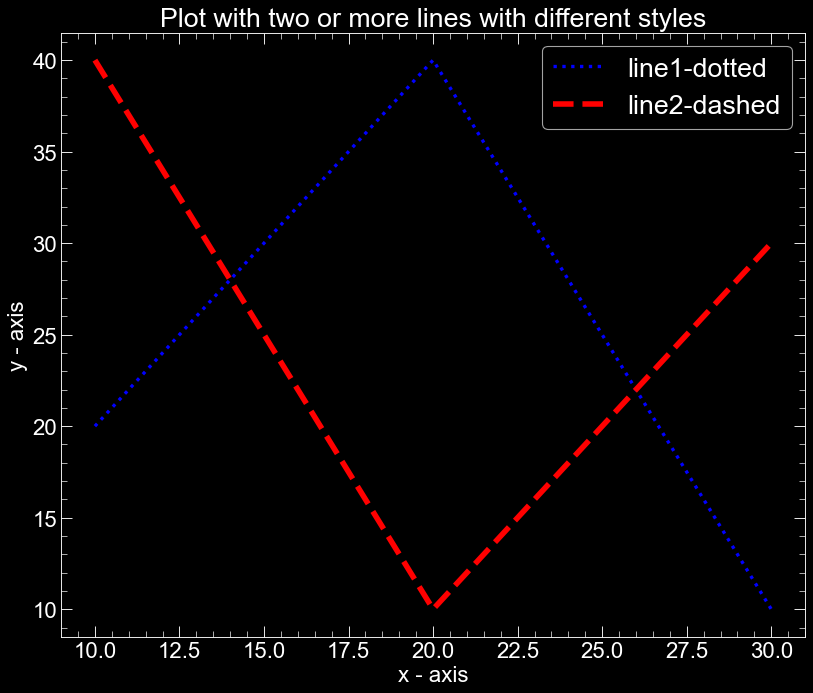

In [95]:
import matplotlib.pyplot as plt
# line 1 points
x1 = [10,20,30]
y1 = [20,40,10]
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# Set the x axis label of the current axis.
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Plot lines and/or markers to the Axes.
plt.plot(x1,y1, color='blue', linewidth = 3,  label = 'line1-dotted',linestyle='dotted')
plt.plot(x2,y2, color='red', linewidth = 5,  label = 'line2-dashed', linestyle='dashed')
# Set a title 
plt.title("Plot with two or more lines with different styles")
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()


### Log plot

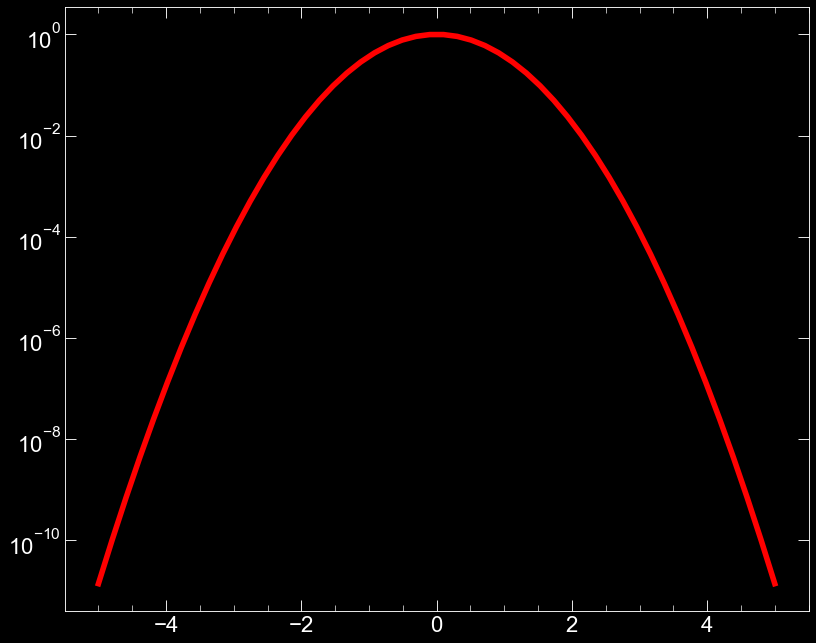

In [96]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x, y,'r',linewidth=5);

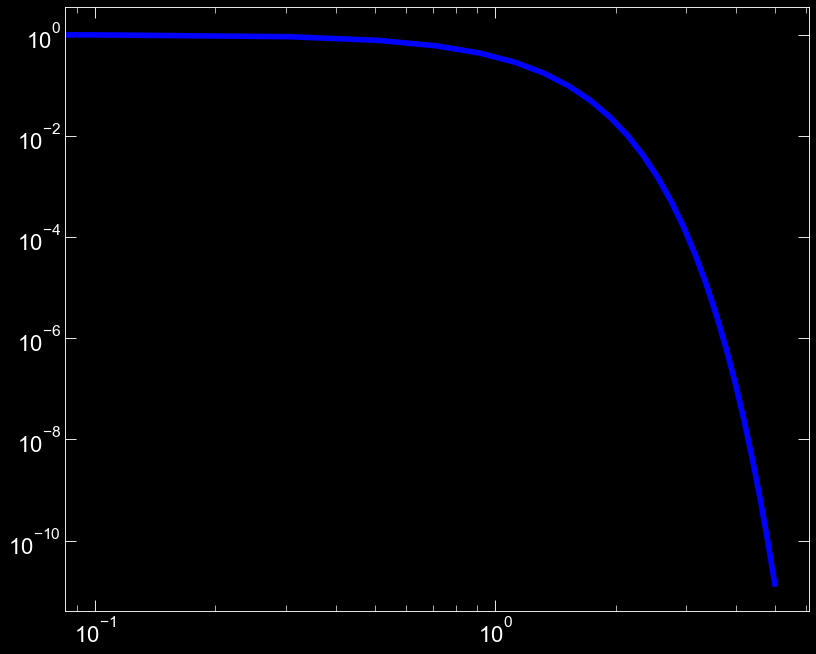

In [97]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.loglog(x, y,'b',linewidth=5);

## Multi-panel plots 

There are four main ways to create multi-panel plots in matplotlib.  From lowest to highest-level they are (roughly):

1. ``fig.add_axes()``: useful for creating inset plots.
2. ``fig.add_subplot()``: useful for simple multi-panel plots.
3. ``plt.subplots()``: convenience function to create multiple subplots.
4. ``plt.GridSpec()``: useful for more involved layouts.

### 1. ``fig.add_axes()``

The ``add_axes`` method allows you to create an axes instance by specifying the size relative to the figure edges.

The argument is ``[left, bottom, width, height]`` which specifies the axes extent in fractions of the figure size (i.e. between 0 and 1):

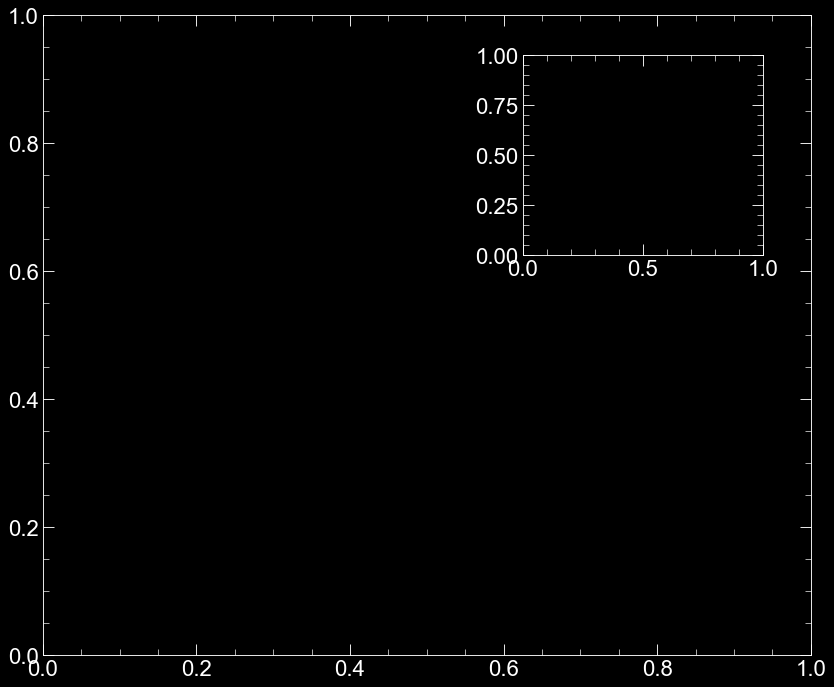

In [70]:
fig = plt.figure()
main_ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
inset_ax = fig.add_axes([0.6, 0.6, 0.25, 0.25])

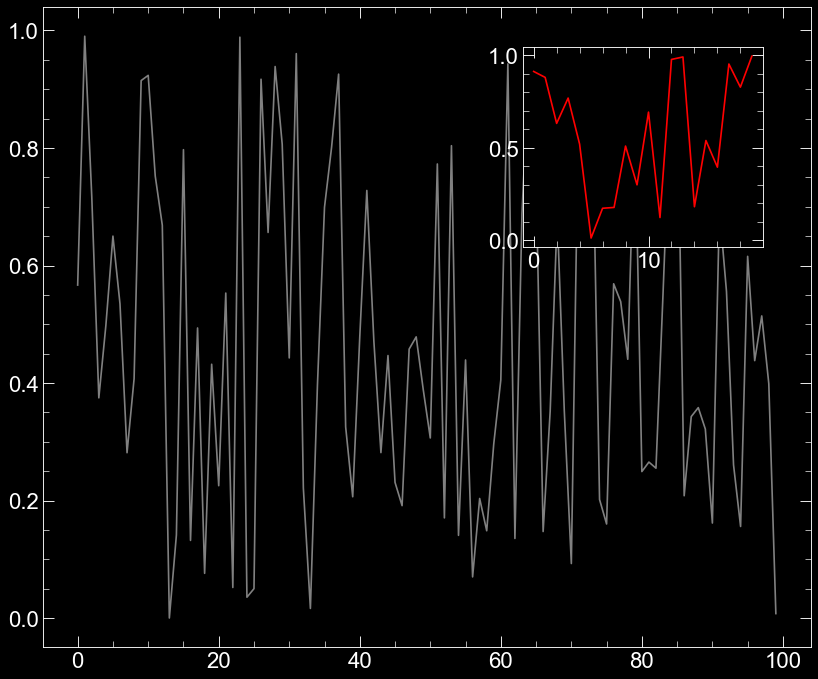

In [73]:
fig = plt.figure()
main_ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
inset_ax = fig.add_axes([0.6, 0.6, 0.25, 0.25])
main_ax.plot(np.random.rand(100), color='gray')
inset_ax.plot(np.random.rand(20), color='red')
plt.show()

### 2. ``fig.add_subplot()``

If you're trying to create multiple axes in a grid, you might use ``add_axes()`` repeatedly, but calculating the extent for each axes is not trivial.  The ``add_subplot()`` method can streamline this.

The arguments are of the form ``N_vertical, N_horizontal, Plot_number``, and the indices start at 1 (a holdover from MATLAB):

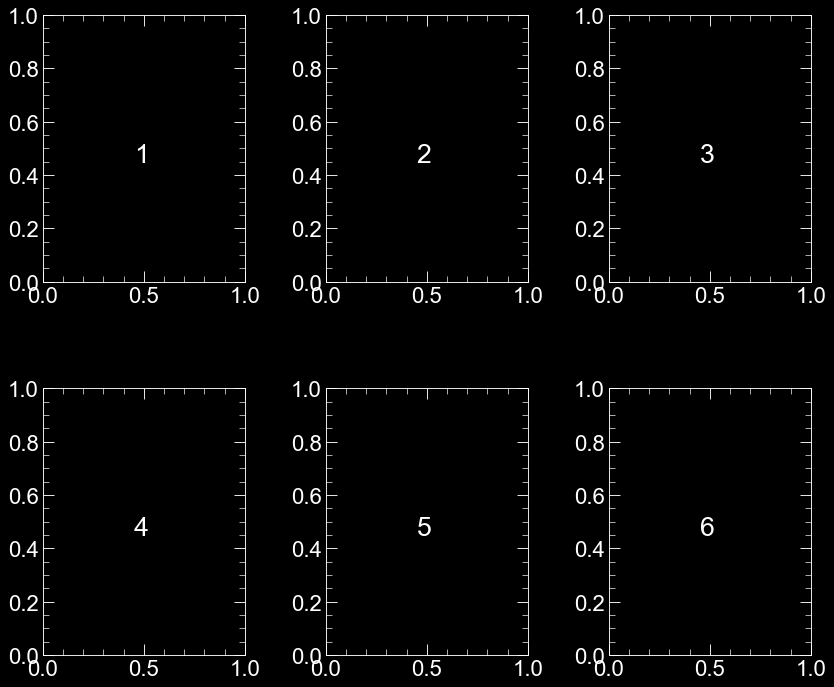

In [48]:
fig = plt.figure()
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.45, 0.45, str(i), fontsize=24)

fig.subplots_adjust(left=0.1, right=0.9,
                    bottom=0.1, top=0.9,
                    hspace=0.4, wspace=0.4)

## Simple 3D plotting with matplotlib
You can create 3d axes with the `projection='3d'` keyword to `add_subplot`:

    fig = plt.figure()
    fig.add_subplot(...,
                    projection='3d')

Here is a simple 3D surface plot:

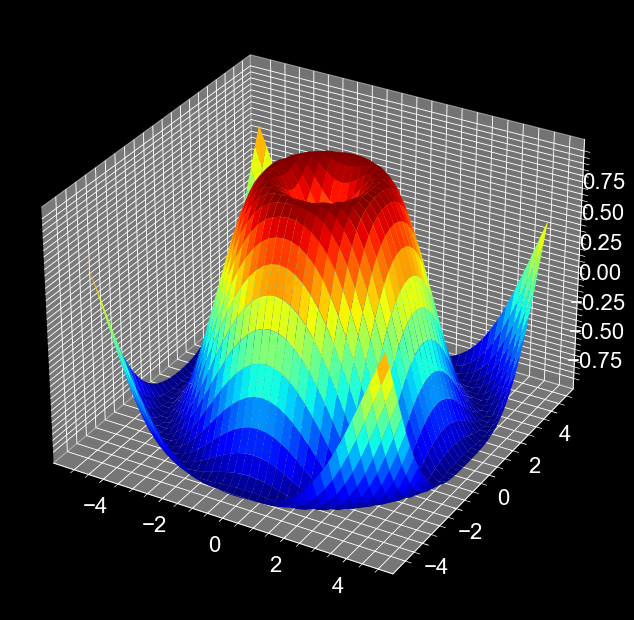

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)

### 3. ``plt.subplots()``

because creating a full grid of subplots is such a common task, matplotlib recently added the ``plt.subplots()`` command which creates the figure and axes in one go.

The arguments are ``N_vertical``, ``N_horizontal``, and the axes are returned within a Numpy array:

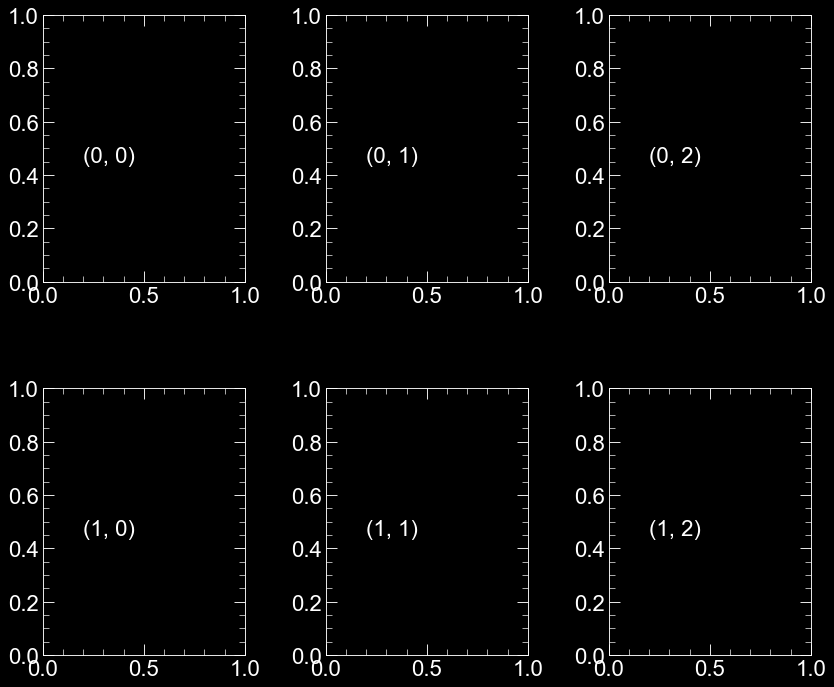

In [99]:
fig, ax = plt.subplots(2, 3, figsize=(12,10))
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.2, 0.45, str((i, j)), fontsize=20)
        
fig.subplots_adjust(left=0.1, right=0.9,
                    bottom=0.1, top=0.9,
                    hspace=0.4, wspace=0.4)

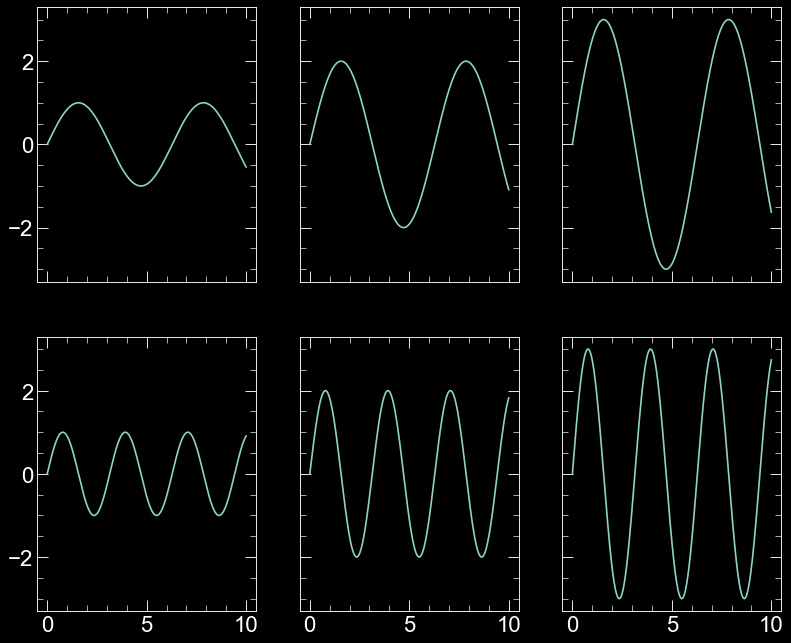

### 4. ``plt.GridSpec()``

``GridSpec`` is the highest-level routine for creating subplots.  It's an abstract object that allows the creation of multi-row or multi-column subplots via an intuitive slicing interface:

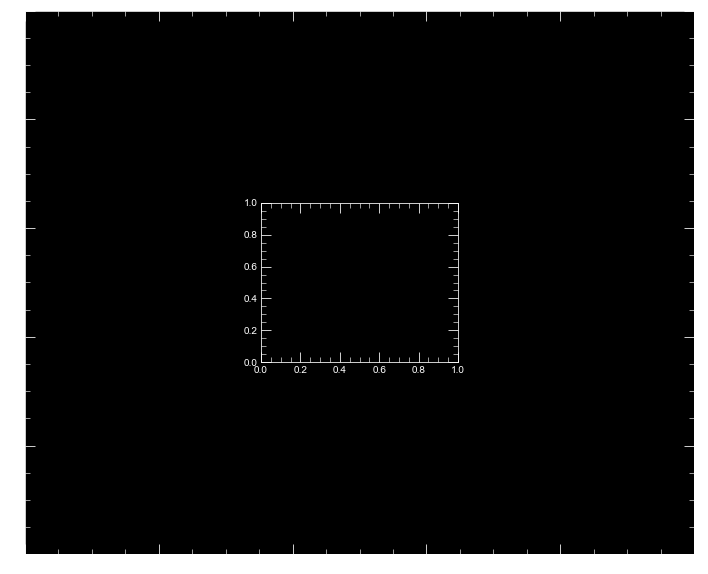

In [78]:
%matplotlib inline
gs = plt.GridSpec(3, 3)  # a 3x3 grid
fig = plt.figure(figsize=(12, 10))  # figure size in inches

ax1=fig.add_subplot(gs[:, :])
ax2=fig.add_subplot(gs[1, 1])

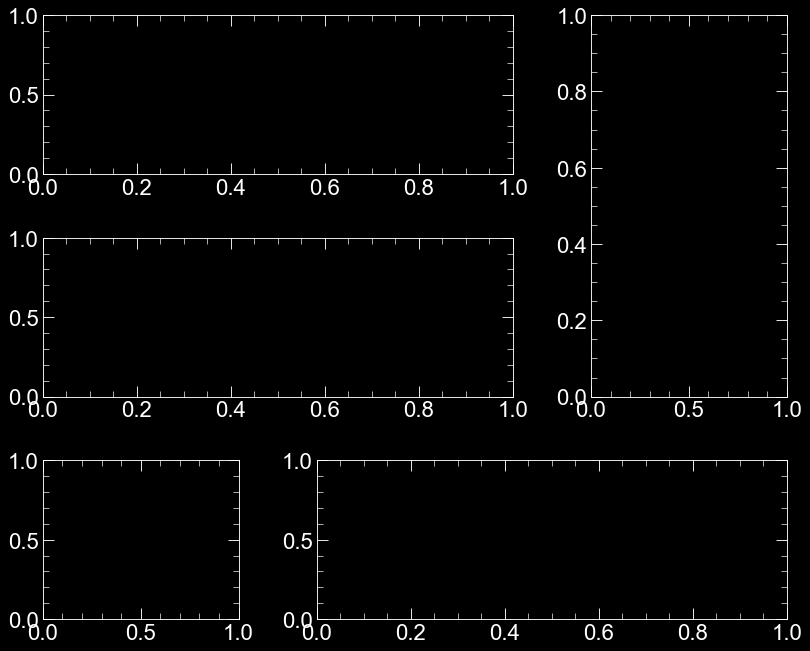

In [54]:
gs = plt.GridSpec(3, 3, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=(12, 10))

ax1=fig.add_subplot(gs[1, :2])
ax2=fig.add_subplot(gs[0, :2])
ax3=fig.add_subplot(gs[2, 0])
ax4=fig.add_subplot(gs[:2, 2])
ax5=fig.add_subplot(gs[2, 1:])

### Reading in Images